In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
# %config InlineBackend.figure_format='retina'

In [24]:
print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 1.4.2
numpy   version = 1.22.3
seaborn version = 0.11.2


In [27]:
df = pd.read_csv('./diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [28]:
# การดูข้อมูลคอลัมน์ Outcome 
d = df['Outcome'].unique()
d

array([1, 0], dtype=int64)

การอธิบายความหมายในแต่ละคอลัมน์
1) Pregnancies:จำนวนครั้งที่ตั้งครรภ์
2) Glucose: กลูโคส
3) BloodPressure: ความดันโลหิต
4) SkinThickness: ความหนาของผิวหนัง
5) Insuline: อินซูลิน
6) BMI: ดัชนีมวลกาย (น้ำหนักเป็นกิโลกรัม/(ส่วนสูงเป็นเมตร)^2)
7) DiabetesPedigreeFunction: ตรวจหาแนวโน้มการเป็นเบาหวาน
8) Age: อายุ
9) Outcome: ผลลัพธ์ ตัวแปรคลาส (0: ไม่เป็นเบาหวาน, 1: เป็นเบาหวาน)

การแปลงตัวเลขให้เป็นตัวอักษร เช่น 0 เป็น 'No_Diabetes' คือไม่เป็นเบาหวาน, 1 เป็น 'Diabetes' คือเป็นเบาหวาน

StandardScaler คือการแปลงสเกลข้อมูล Features (คุณสมบัติ) ที่มีหน่วยวัดแตกต่างกัน ให้มีสเกลหน่วยวัดเหมือนกัน เช่น บางข้อมูลมีหน่วยวัดเป็น กิโลเมตร เมตร เซนติเมตร หรือบาท เป็นต้น ดังนั้นการกำหนดสเกลให้เหมือนกัน โดยการปรับให้ค่าเฉลี่ย (Mean) เท่ากับ 0 และค่าเบี่ยงแบนมาตรฐาน (Standard Deviation: SD) เท่ากับ 1 ตาม coding ดังต่อไปนี้

In [5]:
# #Label Encoding: การแปลงตัวอักษรให้เป็นตัวเลข
# class_names, y = np.unique(df['Outcome'], return_inverse=True)
# class_names
# y

# import numpy as np
# df['Outcome'] = np.where(df['Outcome']==0, 'No', 'Yes')

target_map = {0: 'No_Diabetes', 1: 'Diabetes'}
df['Outcome'] = df['Outcome'].map(target_map)

df.sample(5,random_state=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
285,7,136,74,26,135,26.0,0.647,51,No_Diabetes
101,1,151,60,0,0,26.1,0.179,22,No_Diabetes
581,6,109,60,27,0,25.0,0.206,27,No_Diabetes
352,3,61,82,28,0,34.4,0.243,46,No_Diabetes
726,1,116,78,29,180,36.1,0.496,25,No_Diabetes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [7]:
X = df.iloc[:,:-1] #.values 
y = df.iloc[:,-1] #.values 

In [8]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y

0         Diabetes
1      No_Diabetes
2         Diabetes
3      No_Diabetes
4         Diabetes
          ...     
763    No_Diabetes
764    No_Diabetes
765    No_Diabetes
766       Diabetes
767    No_Diabetes
Name: Outcome, Length: 768, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [11]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
637,2,94,76,18,66,31.6,0.649,23
609,1,111,62,13,182,24.0,0.138,23
38,2,90,68,42,0,38.2,0.503,27
308,0,128,68,19,180,30.5,1.391,25
466,0,74,52,10,36,27.8,0.269,22
...,...,...,...,...,...,...,...,...
347,3,116,0,0,0,23.5,0.187,23
452,0,91,68,32,210,39.9,0.381,25
337,5,115,76,0,0,31.2,0.343,44
563,6,99,60,19,54,26.9,0.497,32


In [12]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
268,0,102,52,0,0,25.1,0.078,21
113,4,76,62,0,0,34.0,0.391,25
18,1,103,30,38,83,43.3,0.183,33
602,1,124,74,36,0,27.8,0.100,30
91,4,123,80,15,176,32.0,0.443,34
...,...,...,...,...,...,...,...,...
632,2,111,60,0,0,26.2,0.343,23
278,5,114,74,0,0,24.9,0.744,57
747,1,81,74,41,57,46.3,1.096,32
340,1,130,70,13,105,25.9,0.472,22


In [13]:
y_train 

637    No_Diabetes
609    No_Diabetes
38        Diabetes
308       Diabetes
466    No_Diabetes
          ...     
347    No_Diabetes
452    No_Diabetes
337       Diabetes
563    No_Diabetes
512    No_Diabetes
Name: Outcome, Length: 614, dtype: object

In [14]:
y_test 

268    No_Diabetes
113    No_Diabetes
18     No_Diabetes
602    No_Diabetes
91     No_Diabetes
          ...     
632    No_Diabetes
278    No_Diabetes
747    No_Diabetes
340    No_Diabetes
174    No_Diabetes
Name: Outcome, Length: 154, dtype: object

StandardScaler คือการแปลงสเกลข้อมูล Features (คุณสมบัติ) ที่มีหน่วยวัดแตกต่างกัน ให้มีสเกลหน่วยวัดเหมือนกัน เช่น บางข้อมูลมีหน่วยวัดเป็น กิโลเมตร เมตร เซนติเมตร หรือบาท เป็นต้น ดังนั้นการกำหนดสเกลให้เหมือนกัน โดยการปรับให้ค่าเฉลี่ย (Mean) เท่ากับ 0 และค่าเบี่ยงแบนมาตรฐาน (Standard Deviation: SD) เท่ากับ 1 ตาม coding ดังต่อไปนี้

In [15]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [16]:
# Create the logistic regression model
#model = LogisticRegression(C=10.0, solver='lbfgs')

model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict 

array(['No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'No_Diabetes',
       'No_Diabetes', 'No_Diabetes', 'Diabetes', 'No_Diabetes',
       'No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'No_Diabetes',
       'No_Diabetes', 'Diabetes', 'No_Diabetes', 'No_Diabetes',
       'No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'No_Diabetes',
       'No_Diabetes', 'No_Diabetes', 'Diabetes', 'No_Diabetes',
       'Diabetes', 'Diabetes', 'No_Diabetes', 'No_Diabetes', 'Diabetes',
       'No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'No_Diabetes',
       'Diabetes', 'No_Diabetes', 'No_Diabetes', 'Diabetes',
       'No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'No_Diabetes',
       'Diabetes', 'Diabetes', 'No_Diabetes', 'Diabetes', 'No_Diabetes',
       'No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'No_Diabetes',
       'No_Diabetes', 'No_Diabetes', 'Diabetes', 'No_Diabetes',
       'No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'No_Diabetes',
       'No_Diabetes', 'No_Diabetes', 'No_Diabetes', 'Diabetes',
    

In [17]:
y_predict.reshape(-1, 1)

array([['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['Diabetes']

In [18]:
# การประเมินโมเดล
accuracy = model.score(X_test, y_test).round(2)
print('Test accuracy:', accuracy)

Test accuracy: 0.79


In [19]:
class_names = df['Outcome'].unique()
class_names

array(['Diabetes', 'No_Diabetes'], dtype=object)

##### การประเมินโมเดลด้วย confusion matrix ในกรณีที่ class เป็น Yes: เป็นเบาหวาน หรือ No: ไม่เป็นเบาหวาน

Accuracy Score: 0.79
              precision    recall  f1-score   support

    Diabetes       0.70      0.57      0.63        49
 No_Diabetes       0.82      0.89      0.85       105

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154

[[28 21]
 [12 93]]


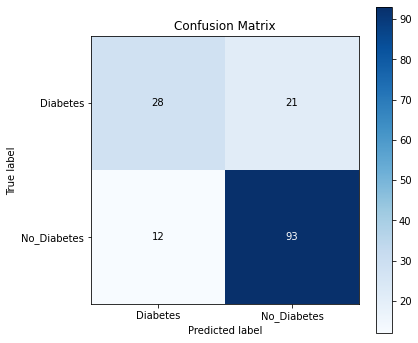

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_predict)))
#print('Accuracy Score:',accuracy_score(y_test, y_predict).round(2))
print(classification_report(y_test, y_predict, target_names=class_names))
cm = confusion_matrix(y_test, y_predict)
print(cm)

#pip install scikit-plot
import scikitplot as skplot
plt.rcParams['figure.figsize'] = 6,6 #10 x 10
skplot.metrics.plot_confusion_matrix(y_test, y_predict)
plt.show()

##### การประเมินโมเดลด้วย confusion matrix ในกรณีที่ class เป็น 0: เป็นเบาหวาน หรือ 1: ไม่เป็นเบาหวาน

In [21]:
# import matplotlib.pyplot as plt
# import numpy
# from sklearn import metrics
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

# #การประเมินโมเดลที่เป็นตาราง
# confusion_matrix = confusion_matrix(y_test, y_predict)
# print("confusion_matrix\n", confusion_matrix)
# print(classification_report(y_test, y_predict))

# #การประเมินโมเดลที่เป็นรูปสี
# # actual = numpy.random.binomial(1,.9,size = 1000)
# # predicted = numpy.random.binomial(1,.9,size = 1000)
# confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
# cm_display.plot()
# plt.show()

การวินิจฉัยเบาหวานในสตรีมีครรภ์

In [44]:
Pregnancies = float(input("Enter Pregnancies: "))
Glucose = float(input("Enter Glucose: "))
BloodPressure = float(input("Enter Blood Pressure: "))
SkinThickness = float(input("Enter Skin Thickness: "))
Insuline = float(input("Enter Insuline: "))
BMI = float(input("Enter BMI: "))
DiabetesPedigreeFunction = float(input("Enter Diabetes Pedigree Function: "))
Age = float(input("Enter Age: "))

In [54]:
result = model.predict([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insuline, BMI, DiabetesPedigreeFunction, Age]])
print("ผลการวินิจฉัยพบว่า:", result, "0 = ไม่เป็นเบาหวาน, 1 = เป็นเบาหวาน")

ผลการวินิจฉัยพบว่า: [1] 0 = ไม่เป็นเบาหวาน, 1 = เป็นเบาหวาน


c:\Users\Taechatuch\anaconda3\envs\mydata\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


##### การบันทึกโมเดลไปพัฒนาบนระบบดิจิทัลด้วย Python Django 

วิธีที่ 1

In [99]:
# #https://www.youtube.com/watch?v=rNhVBv0i4os
# # วิธีที่ 1

# from joblib import dump
# dump(model, 'model_logis.joblib')

['model_logis.joblib']

วิธีที่ 2

In [100]:
# from pandas import read_csv

# #Pickle model 
# pd.to_pickle(model, 'model_logis.pickle')

# #Unpickle model 
# model = pd.read_pickle('model_logis.pickle')

วิธีที่ 3

In [47]:
#conda install -c anaconda scikit-learn
#pip install -U scikit-learn
#from sklearn.externals import joblib
import numpy as np
import joblib

joblib.dump(model, 'logis_model.pkl')
model = joblib.load('logis_model.pkl')

วิธีที่ 4

In [40]:
# # save the model to disk
# import joblib 
# filename = 'model.sav'
# joblib.dump(model, filename)

['model.sav']